## Feature Engineering and Selection  for Financial inclusion in Africa Dataset

### Understand The Problem Statement

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this Dataset is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Data source available in the the zindi platform, [Zindi Africa](https://zindi.africa/competitions/financial-inclusion-in-africa)

### Type of the Problem
It is a classification problem where we have to predict whether individuals are most likely to have or use a bank account or not.In a classification problem, we have to predict discrete values based on a given set of independent variable.

### Load Python Packages

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


## Load Dataset

In [2]:
# Import data
data = pd.read_csv('../financial_inclusion/Train.csv')



In [3]:
# print shape 
print('train data shape :', data.shape)

train data shape : (23524, 13)


The above output show the number of rows and columns for dataset 

In [4]:
# Inspect Data by shing the first five rows 
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset 

### Explolatory Data Analysis (overview)

This is the process of finding some insights from you dataset before create predictive models.

**Note:** This is important steps in your Data science workflow.

In [5]:
#show list of columns 
list(data.columns)  

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering you can apply.

In [7]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.

### FEATURE ENGINEERING 

In [8]:
#remove id feature 

data = data.drop(['uniqueid','year'], axis=1)

data.shape 

(23524, 11)

In [15]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder


In [16]:
# Convert bank_account,location_type,cellphone_access and gender_of_respondent to numerical Data
le = LabelEncoder()

data['bank_account'] = le.fit_transform(data['bank_account'])
data['location_type'] = le.fit_transform(data['location_type'])
data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])


#show the first five rows 
data.head() 

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,1,3,24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5,70,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,5,26,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,5,34,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,8,26,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# convert categorical features to numerical features


categorical_features = ['country','relationship_with_head', 'marital_status', 
                        'education_level', 'job_type']

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

(23524, 37)

In [12]:
#show first five rows
data.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,1,3,24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5,70,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,5,26,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,5,34,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,8,26,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# show list of columns 

list(data.columns)


['bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'country_Kenya',
 'country_Rwanda',
 'country_Tanzania',
 'country_Uganda',
 'relationship_with_head_Child',
 'relationship_with_head_Head of Household',
 'relationship_with_head_Other non-relatives',
 'relationship_with_head_Other relative',
 'relationship_with_head_Parent',
 'relationship_with_head_Spouse',
 'marital_status_Divorced/Seperated',
 'marital_status_Dont know',
 'marital_status_Married/Living together',
 'marital_status_Single/Never Married',
 'marital_status_Widowed',
 'education_level_No formal education',
 'education_level_Other/Dont know/RTA',
 'education_level_Primary education',
 'education_level_Secondary education',
 'education_level_Tertiary education',
 'education_level_Vocational/Specialised training',
 'job_type_Dont Know/Refuse to answer',
 'job_type_Farming and Fishing',
 'job_type_Formally employed Government',
 'job_type_Formally emplo

In [14]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))


data['age_of_respondent'] = scaler.fit_transform(data['age_of_respondent'].values.reshape(-1,1))
data['household_size'] = scaler.fit_transform(data['household_size'].values.reshape(-1,1))

In [16]:
#show shape 
data.shape  

(23524, 38)

In [19]:
#show first five rows 
data.head() 

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,1,0.10,0.095238,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0.20,0.642857,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0.20,0.119048,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0.20,0.214286,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0.35,0.119048,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# show data of the first row 
data[:1].values 


array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 1.       , 0.       , 0.       ,
        1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       ]])

### FEATURE SELECTIONS

#### Univariate Selection

In [21]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
#split dataset into features and target
target = data['bank_account']
features = data.drop('bank_account', axis =1)

In [23]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)

#train to find best features
fit = bestfeatures.fit(features,target)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 20 best features 
print(featureScores.nlargest(20,'Score'))  

                                              Specs        Score
29               job_type_Formally employed Private  1398.459048
24               education_level_Tertiary education  1309.442224
28            job_type_Formally employed Government  1287.543695
25  education_level_Vocational/Specialised training  1224.908523
5                                     country_Kenya   605.482163
20              education_level_No formal education   386.875887
22                education_level_Primary education   323.840989
23              education_level_Secondary education   295.349066
1                                  cellphone_access   266.843216
4                              gender_of_respondent   190.722499
31                     job_type_Informally employed   173.777501
10         relationship_with_head_Head of Household   140.201408
7                                  country_Tanzania   131.932939
0                                     location_type   109.282841
17           marital_stat

In [24]:
# fit and tranform into the 20 best features 
transformer = SelectKBest(chi2, k=20)

#transform from 41 features into top 20 features
top_20_features = transformer.fit_transform(features, target)

#show the shape 
top_20_features.shape 

(23524, 20)

#### Feature Importance 


In [25]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

[3.55904170e-02 2.97308582e-02 1.51495009e-01 3.49871566e-01
 2.30035528e-02 2.22733603e-02 1.18917967e-02 1.33343368e-02
 6.97190150e-03 6.48039841e-03 1.70122117e-02 2.21697979e-03
 4.17354132e-03 3.86946372e-03 5.57317083e-03 7.19235492e-03
 1.75806534e-04 1.27499298e-02 1.08589178e-02 5.91197849e-03
 1.91480684e-02 9.46836271e-04 2.21296084e-02 1.82998883e-02
 4.18558379e-02 3.27131394e-02 1.26418361e-03 8.35665727e-03
 3.57181228e-02 4.68408615e-02 4.98678710e-03 1.27773737e-02
 1.79668590e-03 7.99530281e-03 9.50237853e-03 1.52907168e-02]


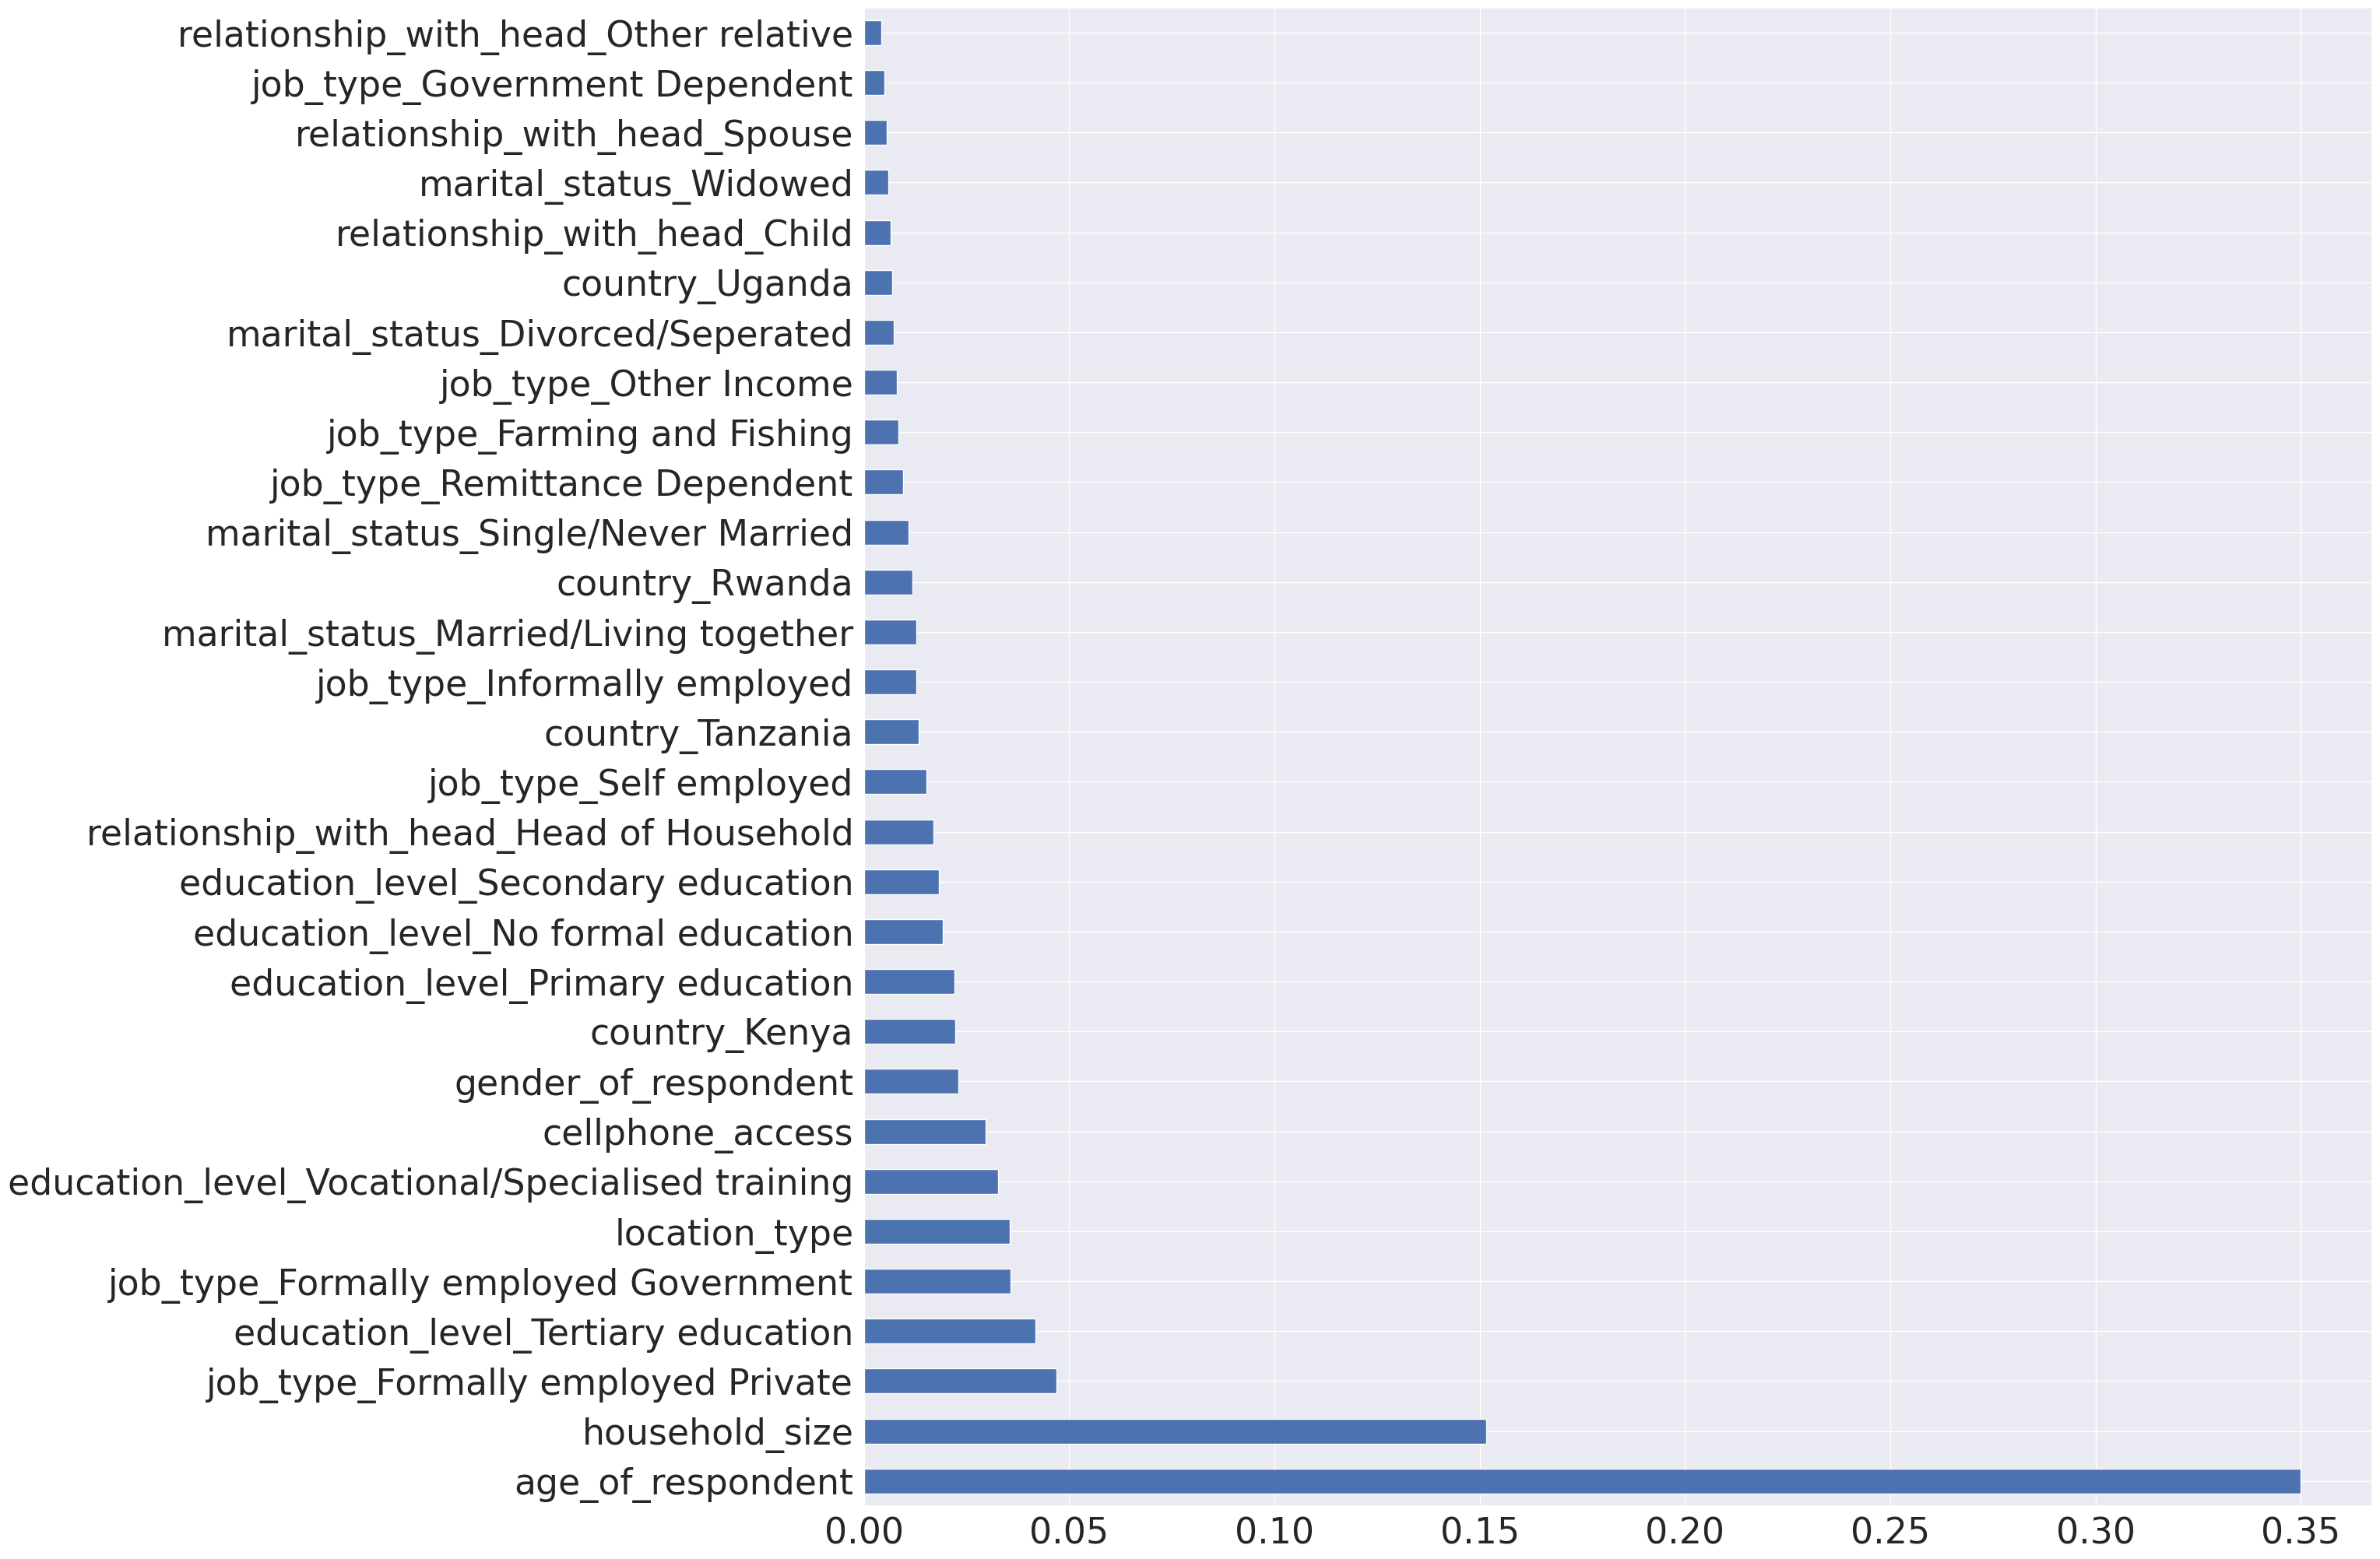

In [26]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show() 

#### Correlation Matrix with Heatmap

<Axes: >

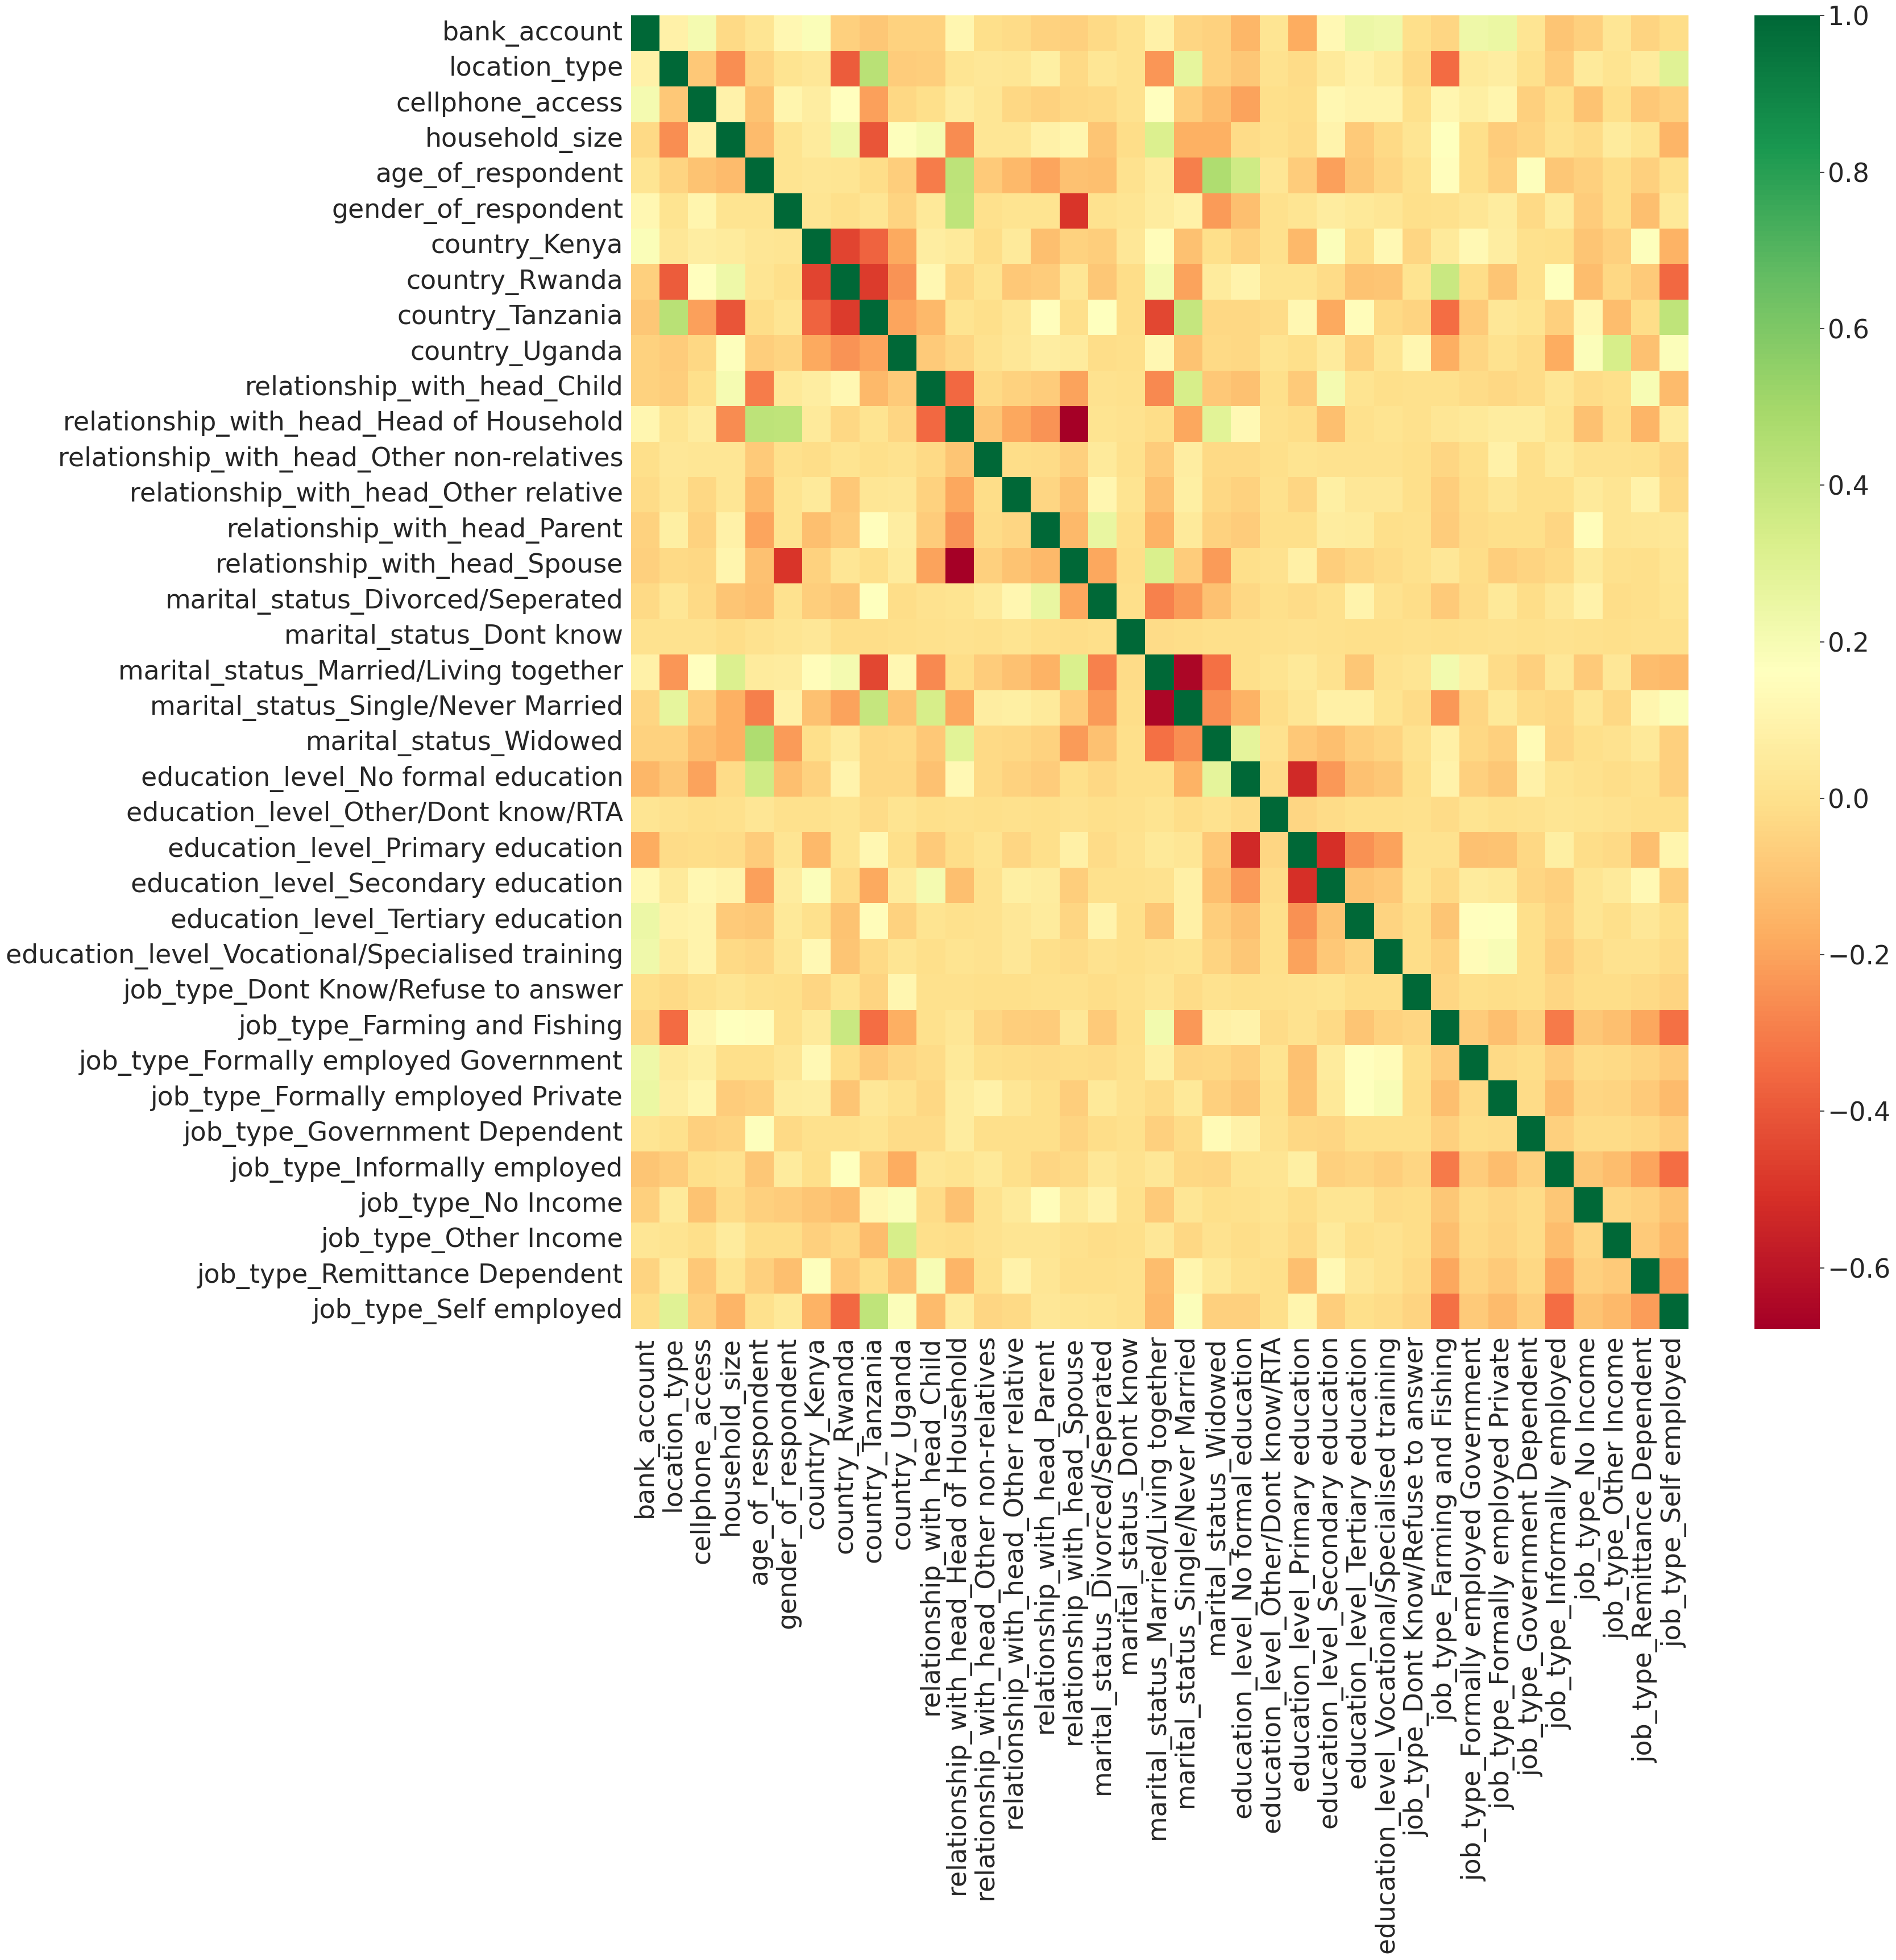

In [27]:
#get correlations of each features in dataset
plt.figure(figsize=(30,30))

#plot heat map
sns.set(font_scale = 3)
# to show number set annot=True
d = sns.heatmap(data.corr(),annot=False, cmap="RdYlGn")

#save the figure 
figure = d.get_figure()
figure.savefig("heatmap_output.png")

# show the heatamp graph 
d   

The `corr()` method in pandas is used to calculate the correlation coefficients between columns in a DataFrame. Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, where:

- A positive value closer to 1 indicates a strong positive correlation, meaning as one variable increases, the other tends to increase as well.
- A negative value closer to -1 indicates a strong negative correlation, meaning as one variable increases, the other tends to decrease.
- A value close to 0 indicates a weak or no linear correlation between the variables.

In [28]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(data.corr()['bank_account']).sort_values(ascending = False)) 

features_corr 

,bank_account
bank_account,1.000000
job_type_Formally employed Private,0.249478
education_level_Tertiary education,0.241958
job_type_Formally employed Government,0.235900
education_level_Vocational/Specialised training,0.232187
cellphone_access,0.209669
country_Kenya,0.186242
education_level_Primary education,0.173702
education_level_No formal education,0.142661
education_level_Secondary education,0.123702


### OTHER RESOURCES TO LEARN FEATURE ENGINEERING AND FEATURE SELECTION

 The following resources will help you gain more knowledge about Feature Engineering and Feature Selection
 
 #### Links for Feature Engineering 

- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
- https://www.kdnuggets.com/2018/12/feature-engineering-explained.html
- https://www.displayr.com/what-is-feature-engineering/
- https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
- https://hackernoon.com/continuous-vs-discrete-variables-in-the-context-of-machine-learning-15d9005e2525
- https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80
- https://www.kaggle.com/questions-and-answers/61046
- https://blog.contactsunny.com/data-science/label-encoder-vs-one-hot-encoder-in-machine-learning

#### links for feature selection

- https://medium.com/@sagar.rawale3/feature-selection-methods-in-machine-learning-eaeef12019cc
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://medium.com/@contactsunny/what-is-feature-selection-and-why-do-we-need-it-in-machine-learning-28a28520607c 